## Sampling Distribution of a Statistic

### Overview

The **sampling distribution of a statistic** is a distribution that describes how a given sample statistic (like the mean or median) would vary across different samples drawn from the same population. This concept is central to inferential statistics, which focuses on drawing conclusions about a larger population from smaller samples.

> ### Key Concepts in Sampling Distribution
>
> - **Sample Statistic:** A numerical measure computed from a sample of data, which could include the mean, median, or mode of that sample.
> - **Data Distribution:** The distribution that shows the frequency of individual data values within a dataset.
> - **Sampling Distribution:** The distribution of a sample statistic over a large number of samples or resamples from the same population.
> - **Central Limit Theorem:** A principle stating that as the sample size increases, the sampling distribution of the mean will approximate a normal distribution, regardless of the data's original distribution.
> - **Standard Error:** Measures the variability or standard deviation of a sample statistic across multiple samples. It differs from the standard deviation, which measures variability within a single dataset.


### Practical Example: Understanding Sampling Distributions through Simulations

Consider an example where we evaluate the annual incomes of loan applicants. We might take multiple samples in the following ways:

- **First Scenario:** Draw one sample of 1,000 individual incomes.
- **Second Scenario:** Compute the mean of 5 incomes, repeating this process to obtain 1,000 such means.
- **Third Scenario:** Calculate the mean of 20 incomes, repeated to acquire 1,000 means.

### Visualization with Histograms

We can visualize these scenarios using histograms:
- The first histogram would likely show a broad and skewed distribution, common with income data.
- The histograms of the means from 5 and 20 incomes would become progressively more compact and bell-shaped.

### Behavior of Sampling Distributions

- **Impact of Increasing Sample Size:** As the size of each sample increases (from 5 to 20 in the scenarios), the resulting sampling distribution becomes narrower and more bell-shaped, as illustrated by the Central Limit Theorem.
- **Interpretation:** This narrowing effect indicates that the sample means cluster more closely around the population mean, reducing variability and enhancing the reliability of the sample mean as an estimate of the population mean.

This approach helps in illustrating how statistical concepts like the Central Limit Theorem operate in practical settings, showing the effect of sample size on the precision of statistical estimates. The Central Limit Theorem is explained in the [Central Limit Theorem](#Central_Limit_Theorem) section.


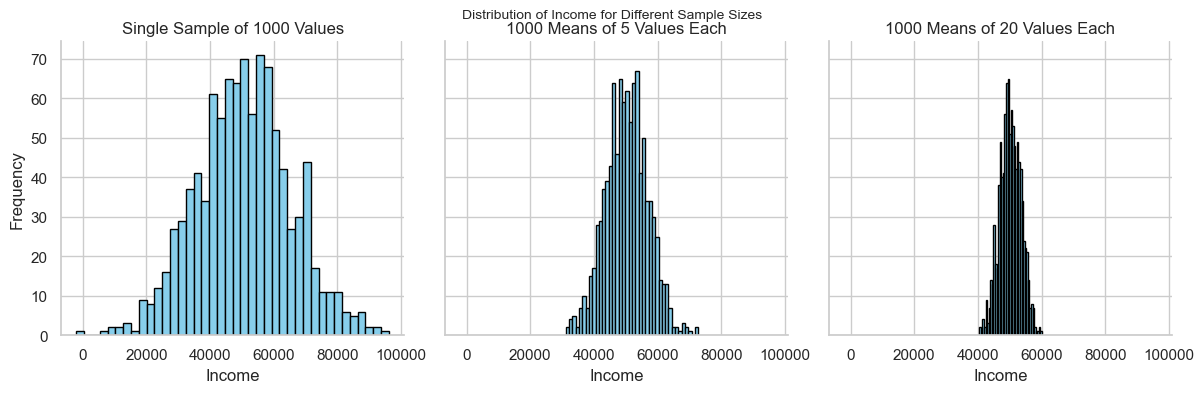

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

population_size = 100000
population = np.random.normal(loc=50000, scale=15000, size=population_size)

# Generate Samples and Sample Means
sample_size_1 = 1000
sample_size_2 = 5
sample_size_3 = 20

sample_1 = np.random.choice(population, size=sample_size_1, replace=False)
sample_2_means = [np.mean(np.random.choice(population, size=sample_size_2, replace=False)) for _ in range(1000)]
sample_3_means = [np.mean(np.random.choice(population, size=sample_size_3, replace=False)) for _ in range(1000)]

data = pd.DataFrame({
    'Income': np.concatenate([sample_1, sample_2_means, sample_3_means]),
    'Type': ['Single Sample of 1000 Values'] * sample_size_1 + ['1000 Means of 5 Values Each'] * 1000 + ['1000 Means of 20 Values Each'] * 1000
})

g = sns.FacetGrid(data, col="Type", col_wrap=3, height=4, aspect=1)
g.map(plt.hist, 'Income', bins=40, color='skyblue', edgecolor='black')
g.set_axis_labels('Income', 'Frequency')
g.set_titles('{col_name}')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Income for Different Sample Sizes', fontsize=10)
plt.show()


<a id="Central_Limit_Theorem"></a>
# Central Limit Theorem

The **Central Limit Theorem (CLT)** is a fundamental statistical principle stating that the distribution of sample means will approximate a normal distribution as the sample size increases, regardless of the population's original distribution. This holds true as long as the sample size is sufficiently large and the data do not deviate excessively from normality.

### Key Implications of the Central Limit Theorem

- **Normal Approximation**: The CLT enables the assumption of normality for the distribution of sample means. This is significant because the normal distribution is mathematically tractable and well-understood, which simplifies statistical calculations and analyses.

- **Statistical Inference**: The theorem justifies the use of normality-based methods for statistical tests and confidence intervals. It allows these tools to be applied broadly, even when the underlying data are not normally distributed, expanding their utility in practical applications.

- **Simplification of Analysis**: By facilitating the normality assumption, the CLT reduces the complexity involved in data analysis. It supports probability estimation and hypothesis testing, which are crucial for making informed decisions in research and applied contexts.

- **Parameter Estimation**: The CLT aids in estimating population parameters, such as means or proportions, with greater accuracy. Knowing that the sampling distribution of the mean is normally distributed enables researchers to make precise predictions about how close the sample mean is to the population mean.

- **Predictability and Control**: In quality control and process optimization, the CLT helps in predicting variations in product quality. This predictability is essential for maintaining high standards in manufacturing and other industries.

- **Reduction of Variability**: According to the CLT, averaging several random observations reduces variability. Thus, the mean becomes a more reliable metric than individual observations, which may be highly variable.

- **Practical Decision Making**: In finance and business analytics, where decisions often hinge on understanding populations from sample data, the CLT provides a mathematical foundation for making reliable decisions based on the sample mean as an estimator of the population mean.

### Relevance in Data Science

Although the Central Limit Theorem forms the basis for many traditional statistical methods, such as hypothesis tests and confidence intervals, its importance in data science is nuanced. With the advent of computational techniques like the bootstrap (refer to "The Bootstrap" on page 61), the reliance on the CLT has lessened. Nonetheless, understanding the CLT is crucial for data scientists to grasp the underpinnings of statistical inference and the conditions under which it applies.


# Standard Error

The **standard error (SE)** quantifies the variability in the sampling distribution of a statistic, reflecting how much a sample statistic, like the mean, would vary if you repeatedly sampled from the same population. It's calculated based on the standard deviation of the sample values and the sample size (n) as follows:

$$
SE = \frac{s}{\sqrt{n}}
$$

This formula shows that as the sample size increases, the standard error decreases. This phenomenon, often illustrated in figures such as the above figure is governed by the square-root-of-n rule, which states that the standard error is inversely proportional to the square root of the sample size. To halve the standard error, one must quadruple the sample size.

### Practical Understanding and Calculation of Standard Error

While the central limit theorem provides theoretical support for the standard error formula, understanding and calculating standard error doesn't strictly require reliance on this theorem. Here's a more intuitive approach:

1. **Direct Measurement**:
   - Gather multiple new samples from the population.
   - Compute the desired statistic (e.g., mean) for each sample.
   - Use the standard deviation of these statistics as an estimate of the standard error.

However, continually collecting new samples for this purpose is often impractical and inefficient. One way with which we can address this issue is boostrapping which is explained in the [Bootstrap notebook](4.The_Bootstrap.ipynb).